In [ ]:
#tüm kütüphaneleri yükledik
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt #zaman, saat ve tarihlerle ilgili işlemler yapmamızı sağlayar
import numpy as np
from keras.layers import Dense,LSTM,Embedding,Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#verimizi okuttuk ilk 5 satırı gösterdik
data = pd.read_csv("/content/drive/MyDrive/Colabnot/TWTR.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-10,62.950001,63.369999,61.470001,61.560001,61.560001,7032100
1,2021-09-13,61.299999,61.410000,58.450001,59.660000,59.660000,16851600
2,2021-09-14,60.070000,60.700001,59.490002,60.189999,60.189999,8240100
3,2021-09-15,60.099998,61.910000,59.639999,61.840000,61.840000,13074500
4,2021-09-16,61.529999,62.610001,60.930000,62.290001,62.290001,9918700


In [ ]:
#datanın sütunları ve veri tipleri
data.info

<bound method DataFrame.info of            Date       Open       High        Low      Close  Adj Close  \
0    2021-09-10  62.950001  63.369999  61.470001  61.560001  61.560001   
1    2021-09-13  61.299999  61.410000  58.450001  59.660000  59.660000   
2    2021-09-14  60.070000  60.700001  59.490002  60.189999  60.189999   
3    2021-09-15  60.099998  61.910000  59.639999  61.840000  61.840000   
4    2021-09-16  61.529999  62.610001  60.930000  62.290001  62.290001   
..          ...        ...        ...        ...        ...        ...   
247  2022-09-02  38.860001  39.009998  38.290001  38.630001  38.630001   
248  2022-09-06  38.619999  39.090000  38.060001  38.650002  38.650002   
249  2022-09-07  39.299999  41.250000  39.299999  41.200001  41.200001   
250  2022-09-08  41.000000  42.169998  40.980000  41.849998  41.849998   
251  2022-09-09  41.880001  42.299999  41.509998  42.189999  42.189999   

       Volume  
0     7032100  
1    16851600  
2     8240100  
3    13074500  

In [ ]:
#boyutu
data.shape

(252, 7)

In [ ]:
#boş değer kontrolü
data.isna().sum() # boş değer yok

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

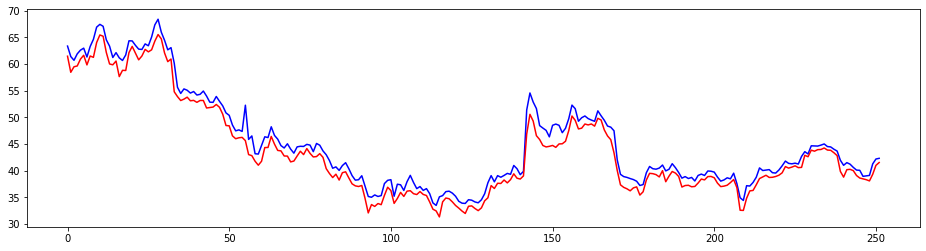

In [ ]:
#görselleştirme yapalım
plt.figure(figsize=(16,4))
ax = plt.axes()
ax.set_facecolor('white')
plt.plot(data['High'], color='blue')
plt.plot(data['Low'], color='red')
plt.show()

In [ ]:
#zaman serisini feature olarak kullanmamız durumunda ayırma işlemi yapmamız gerekir.
#date sütunundan çokça sayıda feature üretebiliyoruz gereksinim doğrultusunda.
#ValueError: could not convert string to float: '2022-04-07   SÜREKLİ ALDIĞIM BU HATANIN ÇZÖÜMÜ OLDU.
def timestamp_changer(df,date_time):    
    df[date_time] = pd.to_datetime(df[date_time]).dt.strftime('%d.%m.%Y.%H:%M')
    df[date_time] = pd.to_datetime(df[date_time])
    years = df[date_time].dt.year
    months = df[date_time].dt.month
    day_of_months = df[date_time].dt.day
    features = pd.DataFrame({
    'year' : years,
    'month' : months,
    'day_of_month' : day_of_months
    })
    return features
def change_timestamp(df,date_time):
    df_timestamp = timestamp_changer(df,date_time=date_time)
    for i in df_timestamp.columns:
        for j in range(len(df_timestamp.columns)):
            try:
                df.insert(j,column=i,value=df_timestamp[i])
                continue
            except:
                continue

change_timestamp(data,'Date')

In [ ]:
#düşüreceğimiz sınıfın özelliklerini farklı kolonlara atadık. Bu sınıfın bir özelliği kalmadı. O yüzden sildik
data.drop('Date',axis=1,inplace=True) 

In [ ]:
#ön işleme aşaması
t_y = data['Close']
x_feat = data.iloc[:,0:3].values

#sc = StandardScaler()
#X_ft = sc.fit_transform(x_feat.values)
#x_ft = pd.DataFrame(columns = x_feat.columns,data=x_ft,index=x_feat.index)

In [ ]:
#scikit-learn tarafından sağlanan train_test_split'ten farklı bir yaklaşım lazım.(kaynağı bul ve detayı yaz)
#def lstm_split(data, n_steps):
  #X,y = [], []
  #for i in range(len(data)-n_steps+1):
    #X.append(data[i:i+n_steps,:-1])
    #y.appened(data[i+n_steps-1,-1])

  #return np.array(X), np.array(y)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(-1, 1))
  
# Scaled feature
#x_after_min_max_scaler = min_max_scaler.fit_transform(x_feat)
  
#print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
#hisse senedi farklı günlerde maksimuma çıkabilir veya en aza indirilebilir ve bu değerleri başkalarını etkilemek için kullanmak pek iyi olmayabilir.(min-max)
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(x_feat)
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.7490783   1.00113938 -1.47982209]
 [-0.29476366  0.71015077 -1.47982209]
 [-0.181185    0.71015077 -1.47982209]
 [-0.06760634  0.71015077 -1.47982209]
 [ 0.04597231  0.71015077 -1.47982209]
 [ 0.15955097  0.71015077 -1.47982209]
 [ 0.50028695  0.71015077 -1.47982209]
 [ 0.61386561  0.71015077 -1.47982209]
 [ 0.72744427  0.71015077 -1.47982209]
 [ 0.84102293  0.71015077 -1.47982209]
 [ 0.95460159  0.71015077 -1.47982209]
 [ 1.29533757  0.71015077 -1.47982209]
 [ 1.40891623  0.71015077 -1.47982209]
 [ 1.52249489  0.71015077 -1.47982209]
 [ 1.63607355  0.71015077 -1.47982209]
 [-0.63549964 -1.6177581  -1.47982209]
 [-0.63549964 -0.74479227 -1.47982209]
 [-0.63549964 -0.45380366 -1.47982209]
 [-0.63549964 -0.16281506 -1.47982209]
 [-0.63549964  0.12817355 -1.47982209]
 [-0.63549964  0.41916216 -1.47982209]
 [-0.63549964  1.29212799 -1.47982209]
 [-0.63549964  1.5831166  -1.47982209]
 [-0.29476366  1.00113938 -1.47982209]
 [-0.181185    1.00113938 -1.47982209

In [ ]:
#x1,y1 = lstm_split(data.values, n_steps=2)

#train =0.8
#split = int(np.ceil(len(x1)*train))
#date_index =data.index

#X_train, X_test = x1[:split], x1[split:]
#y_train, y_test = y1[:split], y1[split:]
#x_train_date, x_test_date = date_index[:split], date_index[split:]

#print(x1.shape, X_train.shape, X_test.shape, y_test.shape)

In [ ]:
future_days = 25
data['Prediction'] = data[['Adj Close']].shift(-future_days)

In [ ]:
X = np.array(data.drop(['Prediction'],1))[:-future_days]
#print(x)
y = np.array(data['Prediction'])[:-future_days]
#print(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

In [ ]:
df = pd.DataFrame(data)
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[3.0000000e+01, 6.0000000e+00, 2.0220000e+03, 3.7529999e+01,
        3.8020000e+01, 3.6990002e+01, 3.7389999e+01, 3.7389999e+01,
        7.1331000e+06],
       [7.0000000e+00, 1.0000000e+00, 2.0220000e+03, 3.7380001e+01,
        3.8240002e+01, 3.7080002e+01, 3.8230000e+01, 3.8230000e+01,
        6.3057000e+06],
       [7.0000000e+00, 5.0000000e+00, 2.0220000e+03, 3.8180000e+01,
        3.8639999e+01, 3.7250000e+01, 3.8380001e+01, 3.8380001e+01,
        8.1557000e+06],
       [7.0000000e+00, 6.0000000e+00, 2.0220000e+03, 3.8209999e+01,
        3.8450001e+01, 3.7740002e+01, 3.8209999e+01, 3.8209999e+01,
        4.8703000e+06],
       [7.0000000e+00, 7.0000000e+00, 2.0220000e+03, 3.8320000e+01,
        3.9509998e+01, 3.8320000e+01, 3.8790001e+01, 3.8790001e+01,
        1.3214900e+07],
       [7.0000000e+00, 8.0000000e+00, 2.0220000e+03, 3.7509998e+01,
        3.7549999e+01, 3.6799999e+01, 3.6810001e+01, 3.6810001e+01,
        2.9822900e+07],
       [7.0000000e+00, 1.1000000e+01, 2.

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[42.52     42.939999 42.830002 44.43     43.939999 44.259998 44.5
 44.400002 43.990002 39.52     39.34     43.009998 39.860001 40.790001
 40.040001 40.459999 40.040001 39.32     38.75     38.619999 38.630001
 38.650002 41.200001 41.849998 42.189999]

[39.00935019 40.45291217 39.93333821 39.77195299 39.9729535  38.07870628
 34.64634252 36.35385083 37.85337033 38.23305688 39.1230181  39.48060215
 39.65134859 39.98866024 40.0610603  39.91298357 39.7996718  39.76567213
 40.07716544 40.74385082 41.06239957 41.58423021 41.79972365 41.55612546
 41.48873156]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


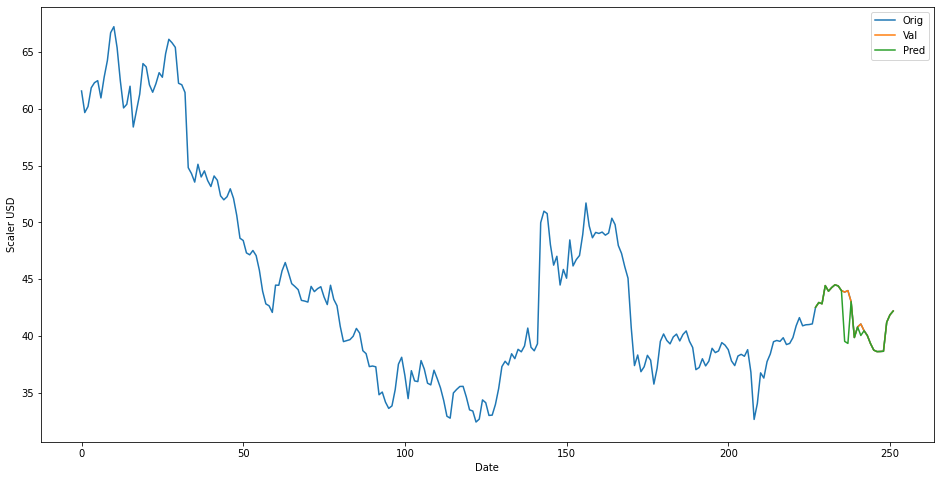

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Scaler USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


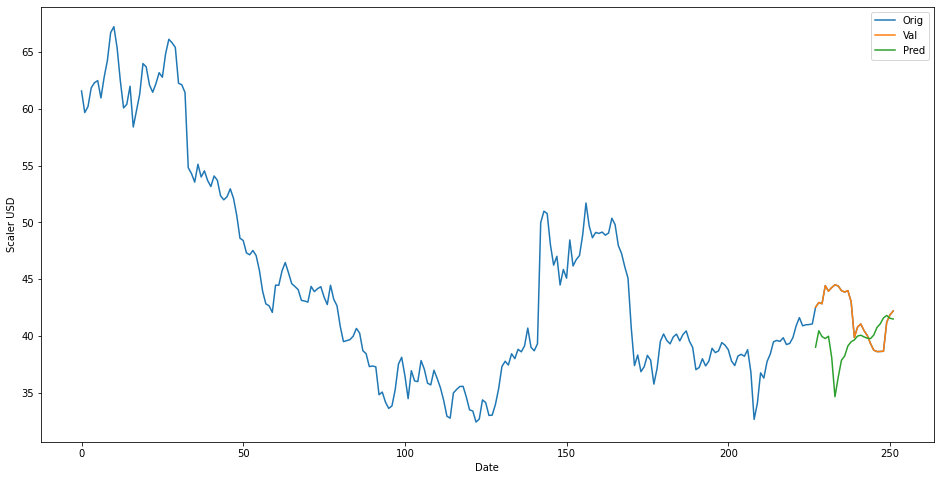

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Scaler USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()